In [47]:
#librerías
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#librerías modelos de ciencia de datos
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [52]:
data = pd.read_csv("winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:

data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

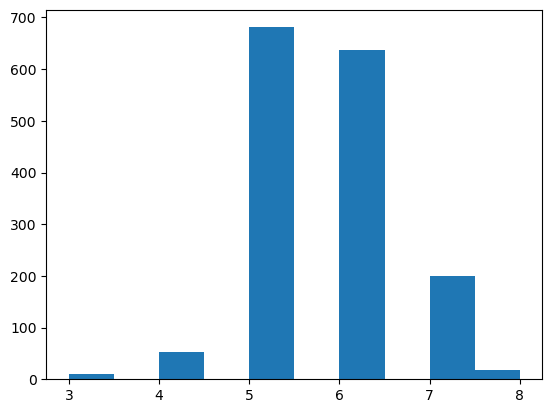

In [9]:
plt.hist(data.quality)

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

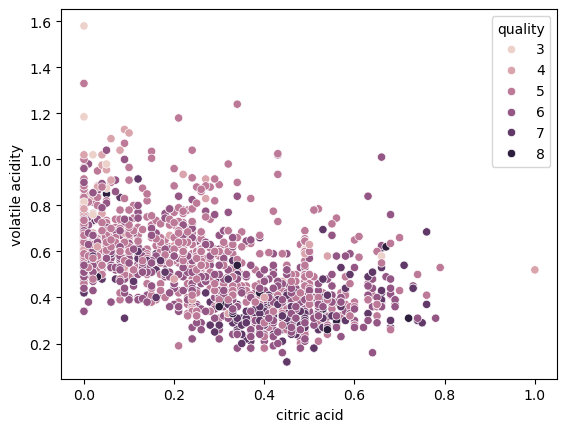

In [39]:
sns.scatterplot(x = "citric acid", y = "volatile acidity", hue = "quality", data = data)

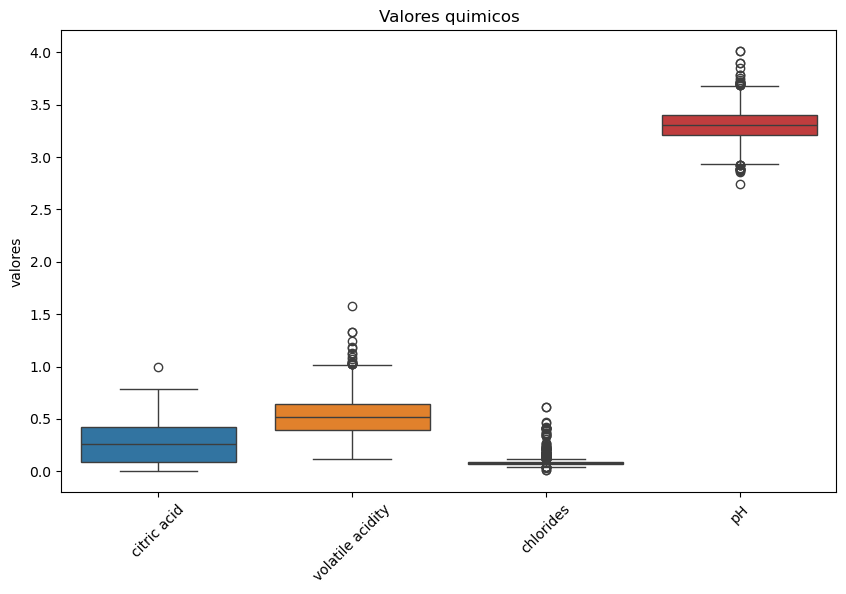

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data[["citric acid", "volatile acidity", "chlorides", "pH"]])
plt.xticks(rotation=45)
plt.title("Valores quimicos")
plt.ylabel("valores")
plt.show()

In [16]:
predictors_col=["citric acid", "volatile acidity", "chlorides", "pH"]

target_col = ["quality"]

In [18]:
predictors = data [predictors_col]
target =data[target_col]


In [19]:
predictors

,citric acid,volatile acidity,chlorides,pH
0,0.00,0.700,0.076,3.51
1,0.00,0.880,0.098,3.20
2,0.04,0.760,0.092,3.26
3,0.56,0.280,0.075,3.16
4,0.00,0.700,0.076,3.51
...,...,...,...,...
1594,0.08,0.600,0.090,3.45
1595,0.10,0.550,0.062,3.52
1596,0.13,0.510,0.076,3.42
1597,0.12,0.645,0.075,3.57


In [20]:
corr = predictors.corr()
corr

,citric acid,volatile acidity,chlorides,pH
citric acid,1.000000,-0.552496,0.203823,-0.541904
volatile acidity,-0.552496,1.000000,0.061298,0.234937
chlorides,0.203823,0.061298,1.000000,-0.265026
pH,-0.541904,0.234937,-0.265026,1.000000


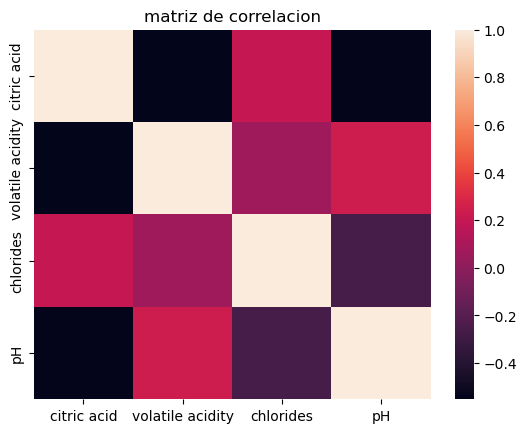

In [22]:
sns.heatmap(corr)
plt.title("matriz de correlacion")
plt.show()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split (predictors, target, test_size=0.2, random_state=13)

In [24]:
tree = DecisionTreeClassifier()

In [27]:
arbol = tree.fit(X_train, Y_train)



[Text(0.4845415271010962, 0.9761904761904762, 'x[1] <= 0.548\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.1811465946000812, 0.9285714285714286, 'x[1] <= 0.317\ngini = 0.649\nsamples = 699\nvalue = [1, 14, 210, 331, 133, 10]'),
 Text(0.3328440608505887, 0.9523809523809523, 'True  '),
 Text(0.08478819867370416, 0.8809523809523809, 'x[3] <= 3.335\ngini = 0.597\nsamples = 145\nvalue = [0, 1, 15, 73, 54, 2]'),
 Text(0.04506699147381242, 0.8333333333333334, 'x[1] <= 0.275\ngini = 0.594\nsamples = 111\nvalue = [0, 1, 9, 52, 47, 2]'),
 Text(0.021653809717147112, 0.7857142857142857, 'x[0] <= 0.43\ngini = 0.586\nsamples = 53\nvalue = [0, 1, 6, 30, 15, 1]'),
 Text(0.010826904858573556, 0.7380952380952381, 'x[3] <= 3.275\ngini = 0.482\nsamples = 26\nvalue = [0, 1, 3, 18, 4, 0]'),
 Text(0.006496142915144133, 0.6904761904761905, 'x[1] <= 0.255\ngini = 0.395\nsamples = 20\nvalue = [0, 1, 0, 15, 4, 0]'),
 Text(0.004330761943429422, 0.6428571428571429, 'x[3] 

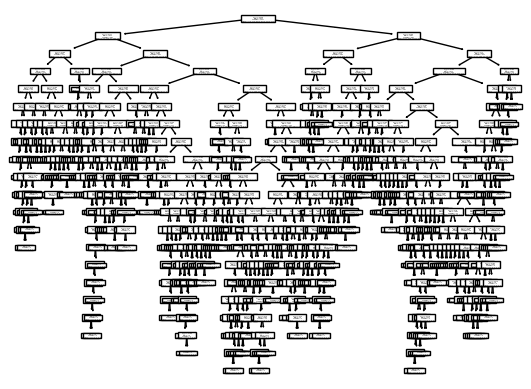

In [28]:
plot_tree(arbol)

In [30]:
predicciones =arbol.predict(X_test)


In [31]:
predicciones

array([6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 7, 7, 6, 7, 5, 6, 5, 6,
       8, 5, 6, 5, 6, 5, 4, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       5, 4, 6, 8, 6, 6, 6, 5, 7, 5, 7, 5, 5, 3, 7, 5, 5, 5, 5, 6, 7, 7,
       7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 7, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5,
       7, 6, 7, 5, 6, 7, 7, 7, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 5, 6, 5, 6, 6, 5, 6, 7, 7, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 4,
       5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6,
       6, 5, 6, 6, 6, 4, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 7, 7, 5, 7,
       5, 5, 4, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6, 4, 7, 5, 6, 6,
       6, 6, 5, 6, 7, 7, 5, 6, 6, 5, 5, 5, 7, 6, 3, 6, 5, 5, 5, 7, 6, 5,
       6, 6, 6, 7, 6, 6, 5, 6, 6, 4, 5, 4, 7, 5, 5, 5, 5, 6, 6, 5, 7, 4,
       6, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5,

In [41]:
accuracy = accuracy_score(Y_test, predicciones)
accuracy

0.55625

In [48]:
precision = precision_score(Y_test, predicciones, average = "weighted")
precision

0.5627140278640317

In [49]:
recall = recall_score(Y_test, predicciones, average = "weighted")
recall

0.55625

In [51]:
f1 = f1_score(Y_test, predicciones, average = "weighted")
f1

0.5590897976648939